In [1]:
import time 
import requests
import json
import csv
import pprint
import pandas as pd
from config import apikey
import seaborn as sns
import seaborn.objects as so
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df =pd.read_csv("data.csv")
df

,Unnamed: 0,ticker,v,vw,o,c,h,l,t,n
0,2,BUD,185073263.0,58.7384,62.43,53.94,67.91,50.59,1641013200000,2105726
1,3,BUD,176759102.0,57.2436,64.01,55.02,66.05,50.59,1643691600000,2060645
2,4,BUD,177299717.0,55.8980,59.94,52.51,63.45,50.59,1646110800000,2053783
3,5,BUD,160603099.0,54.0878,60.79,48.57,63.45,47.23,1648785600000,1951050
4,6,BUD,170988591.0,51.7573,56.98,45.23,58.37,44.51,1651377600000,2004952
...,...,...,...,...,...,...,...,...,...,...
127,134,SBUX,537193724.0,96.9278,98.73,100.01,104.46,89.21,1688184000000,8717838
128,135,SBUX,405849391.0,95.7062,101.47,100.01,104.46,89.21,1690862400000,6640231
129,136,SBUX,278809560.0,94.1343,98.40,100.01,101.92,89.21,1693540800000,4407215
130,137,SBUX,165678871.0,93.6594,91.05,100.01,101.92,89.21,1696132800000,2570335


In [3]:
def fix_unix_time(unix_time_values):
    scaled_time_values = (unix_time_values - min(unix_time_values)) / (max(unix_time_values) - min(unix_time_values))
    return scaled_time_values
# Create a list of Unix time values
t = df['t']
# Convert and scale the Unix time values
st = fix_unix_time(t)
# Add the scaled time values to the DataFrame
df['st'] = st
# Print the DataFrame
df

,Unnamed: 0,ticker,v,vw,o,c,h,l,t,n,st
0,2,BUD,185073263.0,58.7384,62.43,53.94,67.91,50.59,1641013200000,2105726,0.000000
1,3,BUD,176759102.0,57.2436,64.01,55.02,66.05,50.59,1643691600000,2060645,0.046341
2,4,BUD,177299717.0,55.8980,59.94,52.51,63.45,50.59,1646110800000,2053783,0.088197
3,5,BUD,160603099.0,54.0878,60.79,48.57,63.45,47.23,1648785600000,1951050,0.134475
4,6,BUD,170988591.0,51.7573,56.98,45.23,58.37,44.51,1651377600000,2004952,0.179321
...,...,...,...,...,...,...,...,...,...,...,...
127,134,SBUX,537193724.0,96.9278,98.73,100.01,104.46,89.21,1688184000000,8717838,0.816132
128,135,SBUX,405849391.0,95.7062,101.47,100.01,104.46,89.21,1690862400000,6640231,0.862473
129,136,SBUX,278809560.0,94.1343,98.40,100.01,101.92,89.21,1693540800000,4407215,0.908813
130,137,SBUX,165678871.0,93.6594,91.05,100.01,101.92,89.21,1696132800000,2570335,0.953659


In [4]:
#tickers ["BUD","TAP","KO","PEP","BROS","SBUX"]

In [5]:
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]

In [6]:
# Writing code for the different results for each of the stocks
c = df["c"]  # C- Close price  
h = df["h"]  # H- High price
l = df["l"]  # L- Low price  
n = df["n"]  # N- Number of transactions
o = df["o"]  # O- Open price 
t = df["t"]  # T- Unix time
v = df["v"]  # V- Volume
vw =df["vw"] # VW- Volume weighted

# Filter the DataFrame by ticker
bud_df = df[df['ticker'] == 'BUD']
coors_df= df[df['ticker'] == 'TAP']
coke_df= df[df['ticker'] == 'KO']
pepsi_df= df[df['ticker'] == 'PEP']
star_df= df[df['ticker'] == 'SBUX']
dutch_df= df[df['ticker'] == 'BROS']


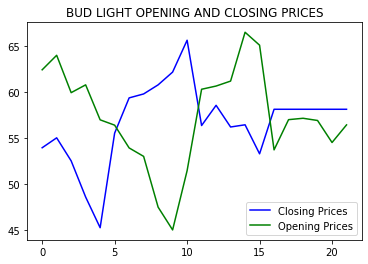

In [20]:
# Here we can see the difference between the opening price and closing price of Bud over time 
x_axis = [x for x in range(len(bud_df))]
plt.plot(x_axis, bud_df["c"], c='b', label="Closing Prices")
plt.plot(x_axis, bud_df["o"], c='g', label="Opening Prices")
plt.title("BUD LIGHT OPENING AND CLOSING PRICES")
plt.legend()
plt.show()

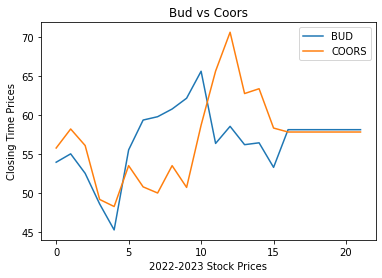

In [25]:
# BUD VS COORS CLOSING TIME COMPARISON
y_axis = [x for x in range(len(coors_df))]
plt.plot(x_axis, bud_df["c"], label="BUD")
plt.plot(y_axis, coors_df["c"], label="COORS")
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Closing Time Prices")
plt.title("Bud vs Coors")
plt.legend()
plt.show()

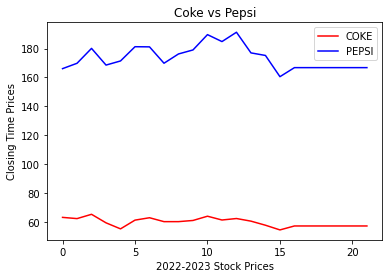

In [24]:
# COKE VS PEPSI CLOSING TIME COMPARISON
x_axis = [x for x in range(len(coke_df))]
Y_axis = [x for x in range(len(pepsi_df))]
plt.plot(x_axis, coke_df["c"], label="COKE", c='r')
plt.plot(y_axis, pepsi_df["c"], label="PEPSI", c='b')
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Closing Time Prices")
plt.title("Coke vs Pepsi")
plt.legend()
plt.show()


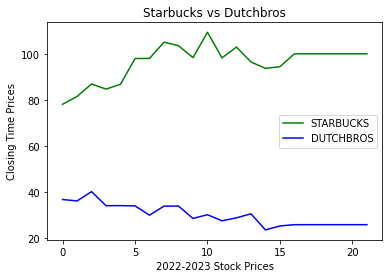

In [23]:
# STARBUCKS VS DUTCHBROS CLOSING TIME COMPARISON
x_axis = [x for x in range(len(star_df))]
Y_axis = [x for x in range(len(dutch_df))]
plt.plot(x_axis, star_df["c"], label="STARBUCKS", c='g')
plt.plot(y_axis, dutch_df["c"], label="DUTCHBROS", c='b')
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Closing Time Prices")
plt.title("Starbucks vs Dutchbros")
plt.legend()
plt.show()


In [ ]:

plt.savefig('Graphs/Complete.png')

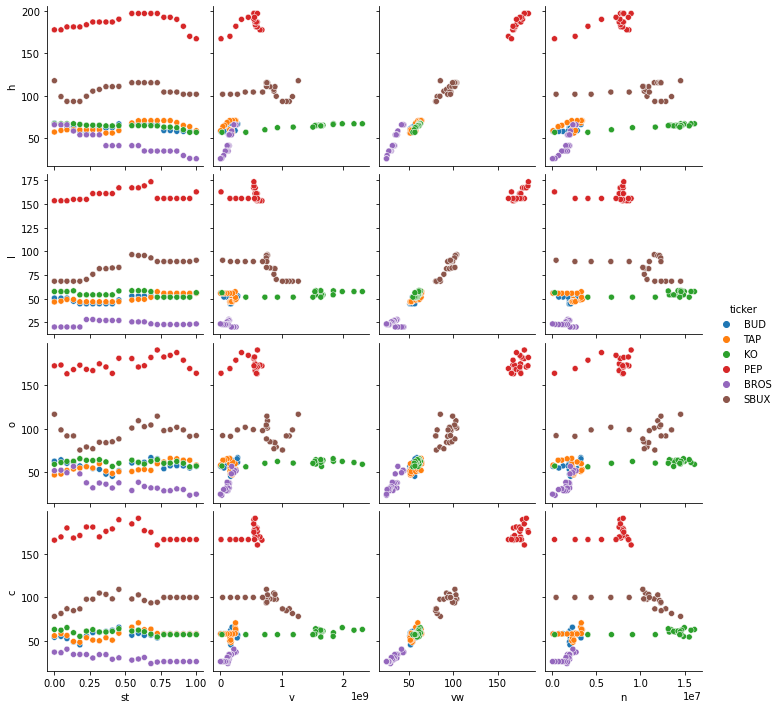

In [26]:
# HERE WE CAN SEE ALL THE DIFFERENT STOCKS AND COMPARE THEM TO THEMSELVES IN ALL OF THEIR DIFFERENT CONTENTS 

sns.pairplot(data=df, hue="ticker", x_vars=["st","v","vw","n"], y_vars=["h","l","o","c"])


In [27]:
sns.pairplot?

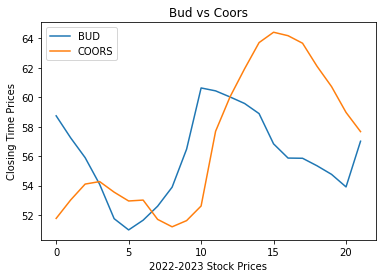

In [29]:
# COMPARING THE VOLUME WEIGHTED PRICES BETWEEN THE BEER STOCKS
x_axis = [x for x in range(len(bud_df))]
y_axis = [x for x in range(len(coors_df))]
plt.plot(x_axis, bud_df["vw"], label="BUD")
plt.plot(y_axis, coors_df["vw"], label="COORS")
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Volume Weighted Prices")
plt.title("Bud vs Coors")
plt.legend()
plt.show()

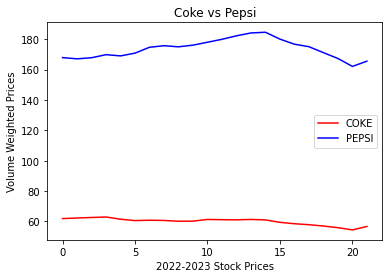

In [30]:
# COMPARING THE VOLUME WEIGHTED PRICES BETWEEN THE SODA STOCKS
x_axis = [x for x in range(len(coke_df))]
Y_axis = [x for x in range(len(pepsi_df))]
plt.plot(x_axis, coke_df["vw"], label="COKE", c='r')
plt.plot(y_axis, pepsi_df["vw"], label="PEPSI", c='b')
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Volume Weighted Prices")
plt.title("Coke vs Pepsi")
plt.legend()
plt.show()


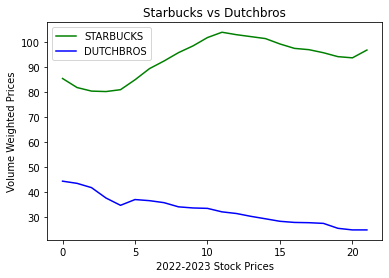

In [31]:
# STARBUCKS VS DUTCHBROS VOLUME WEIGHTED COMPARISON
x_axis = [x for x in range(len(star_df))]
Y_axis = [x for x in range(len(dutch_df))]
plt.plot(x_axis, star_df["vw"], label="STARBUCKS", c='g')
plt.plot(y_axis, dutch_df["vw"], label="DUTCHBROS", c='b')
plt.xlabel("2022-2023 Stock Prices")
plt.ylabel("Volume Weighted Prices")
plt.title("Starbucks vs Dutchbros")
plt.legend()
plt.show()